# Import Liberaries

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# %matplotlib notebook

In [2]:
from scipy import stats

# Data Reading

In [3]:
PATH = os.path.join(os.getcwd(), os.path.join('data', 'Advertising.csv'))
PATH

'C:\\Users\\CompuTek\\Desktop\\data\\Advertising.csv'

In [5]:
dataset = pd.read_csv('Advertising.csv', delimiter=';')
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
dataset.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [7]:
dataset.index

RangeIndex(start=0, stop=200, step=1)

In [8]:
dataset.shape

(200, 4)

## Measuring Center

In [9]:
dataset['Sales'].mean()

14.022500000000003

In [10]:
dataset.mean()

TV           147.0425
Radio         23.2640
Newspaper     30.5540
Sales         14.0225
dtype: float64

In [11]:
dataset.median()

TV           149.75
Radio         22.90
Newspaper     25.75
Sales         12.90
dtype: float64

In [12]:
dataset['Sales'].mode()

0    9.7
dtype: float64

In [13]:
dataset.mode().loc[0]

TV           17.2
Radio         4.1
Newspaper     8.7
Sales         9.7
Name: 0, dtype: float64

## Measuring Spread

In [14]:
dataset.min()

TV           0.7
Radio        0.0
Newspaper    0.3
Sales        1.6
dtype: float64

In [15]:
dataset.max()

TV           296.4
Radio         49.6
Newspaper    114.0
Sales         27.0
dtype: float64

In [16]:
dataset.max()-dataset.min()

TV           295.7
Radio         49.6
Newspaper    113.7
Sales         25.4
dtype: float64

In [17]:
dataset.std()

TV           85.854236
Radio        14.846809
Newspaper    21.778621
Sales         5.217457
dtype: float64

In [18]:
dataset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


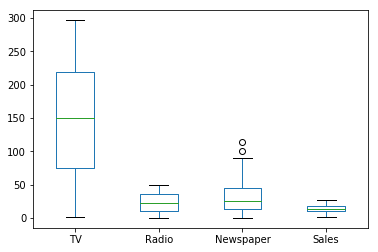

In [19]:
dataset.plot.box()

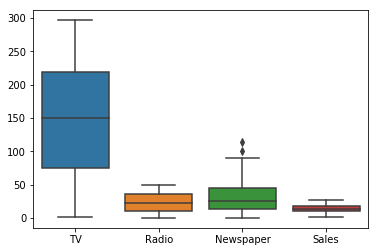

In [20]:
sns.boxplot(data=dataset)

In [21]:
# calculate harmonic mean
from scipy import stats

In [22]:
dataset['Newspaper'].mean(), stats.hmean(dataset['Newspaper'])

(30.553999999999995, 10.510560199380816)

In [23]:
stats.iqr(dataset['Newspaper'])

32.35

In [24]:
stats.describe(dataset['Newspaper'])

DescribeResult(nobs=200, minmax=(0.3, 114.0), mean=30.553999999999995, variance=474.3083256281407, skewness=0.8879959753085498, kurtosis=0.603526874867891)

# Distribution

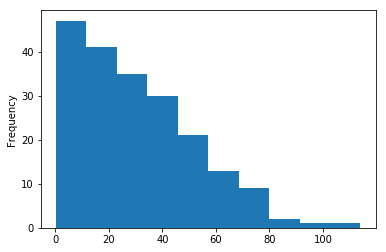

In [25]:
dataset['Newspaper'].plot.hist(bins=10)

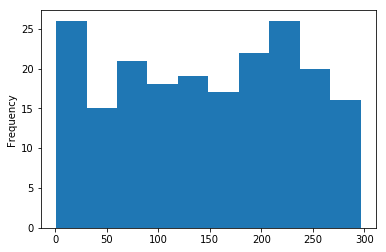

In [26]:
# Multi-indexing
dataset['TV'].plot.hist(bins=10)

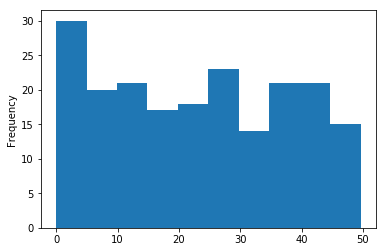

In [27]:
dataset['Radio'].plot.hist(bins=10)

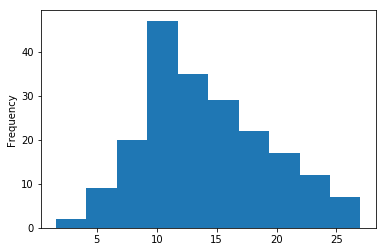

In [28]:
dataset['Sales'].plot.hist(bins=10)

## Correlation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C517668>,
      dtype=object)

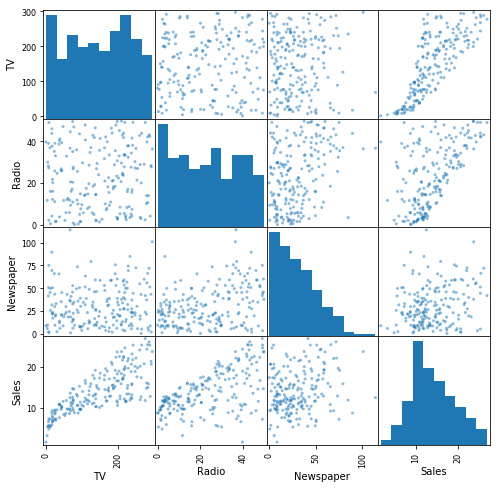

In [29]:
pd.plotting.scatter_matrix(dataset, figsize= (8,8))

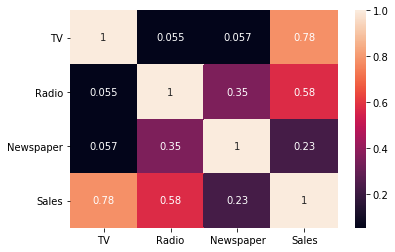

In [30]:
sns.heatmap(dataset.corr(),annot=True)

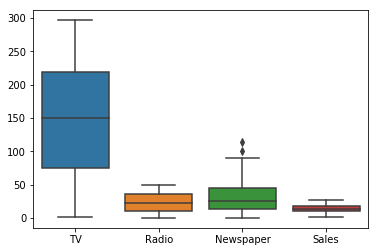

In [31]:
sns.boxplot(data=dataset)

In [32]:
df = dataset[(np.abs(stats.zscore(dataset)) < 3).all(axis =1)]

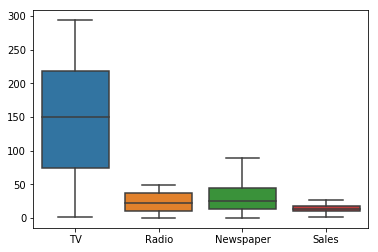

In [33]:
sns.boxplot(data=df)

In [34]:
newspaper = dataset['Newspaper']


In [35]:
q3 = newspaper.quantile(.75)
newspaper.median() + 3* newspaper.std()

91.0858625155685

In [36]:
without1 = newspaper.map(lambda x : newspaper.sort_values(ascending= False)[2:3] if (newspaper.median() + 3* newspaper.std()) else x)

In [ ]:
without = newspaper.map(lambda x : newspaper.sort_values(ascending= False)[2:3] if x > (newspaper.std() * 3 + newspaper.mean()) else x)

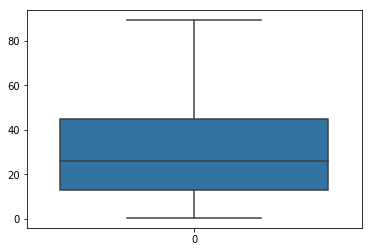

In [106]:
sns.boxplot(data=without)

In [120]:
without.mean()

30.3735

In [53]:
X.shape

(200, 3)

## Advertising Linear Model

In [214]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression
import sklearn.metrics as mc
import seaborn as sns
from math import sqrt
from sklearn.preprocessing import StandardScaler, minmax_scale


In [289]:
X = dataset[['TV', 'Radio', 'Newspaper']]
Y = dataset['Sales']

### MSE & R Squared before Modeling

In [290]:
W = np.zeros([X.shape[1],1])
Y_pred = np.dot(X, W)
J = mse(Y_pred, Y)


In [291]:
R_Square = mc.r2_score(Y, Y_pred)
print(R_Square)

-7.259557207100876


In [292]:
print('mean square error: ', J,'\n', 'root mean square error: ', sqrt(J),'\n' 'R^2:' ,R_Square)

mean square error:  223.71625 
 root mean square error:  14.957147121025454 
R^2: -7.259557207100876


### Applying Model 

In [295]:
LR = LinearRegression()

LR.fit(X, Y)
LR.intercept_, LR.coef_ # w0, w1

(2.9388893694594067, array([ 0.04576465,  0.18853002, -0.00103749]))

### MSE & R Squared after Modeling

In [303]:
Y_hat1 = LR.predict(X)
J_hat1 = mse(Y_hat1, Y)
print(J_hat1)

2.784126314510936


In [328]:
R_Square1 = mc.r2_score(Y, Y_hat1)
print(R_Square1)

0.8972106381789522


In [128]:
print('mean square error: \n', str(J_hat),'root mean square error: \n', str(sqrt(J_hat)),'R^2:',str(R_Square))

mean square error: 
 2.784126314510936 root mean square error: 
 1.6685701407225697 R^2: 0.8972106381789522


## with Standardization

In [309]:
X2 = dataset[['TV', 'Radio', 'Newspaper']]
Y2 = dataset['Sales'].values.reshape(-1,1)
sc_X = StandardScaler()
sc_Y = StandardScaler()
X_sc = sc_X.fit_transform(X2)
Y_sc = sc_Y.fit_transform(Y2)

In [310]:
LR2 = LinearRegression()
LR2.fit(X_sc,Y_sc)
LR2.intercept_, LR2.coef_

Y_hat2 = LR2.predict(X_sc)
J_hat2 = mse(Y_hat2, Y_sc)
print(J_hat2)
R_Square2 = mc.r2_score(Y_sc, Y_hat2)
print(R_Square2)

0.10278936182104788
0.8972106381789521


In [261]:
print('mean square error: \n', str(J_hat),'root mean square error: \n', str(sqrt(J_hat)),'R^2:',str(R_Square))

mean square error: 
 0.10278936182104788 root mean square error: 
 0.32060780062413935 R^2: 0.8972106381789521


{'whiskers': [<matplotlib.lines.Line2D at 0x159a7f28>,
 'caps': [<matplotlib.lines.Line2D at 0x159cd860>,
 'boxes': [<matplotlib.lines.Line2D at 0x154f1cf8>,
 'medians': [<matplotlib.lines.Line2D at 0x159cdef0>,
 'fliers': [<matplotlib.lines.Line2D at 0x159cdfd0>,
 'means': []}

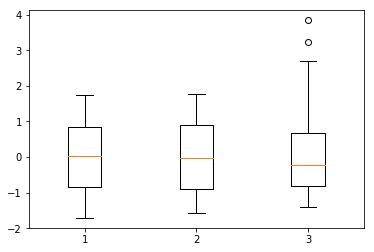

In [262]:
plt.boxplot(X_sc)


## Standardization without outliers

In [311]:
X3 = dataset[['TV', 'Radio', 'Newspaper']]
Y3 = dataset['Sales'].values.reshape(-1,1)
sc_X = StandardScaler()
sc_Y = StandardScaler()
X_sc = sc_X.fit_transform(X3)
Y_sc = sc_Y.fit_transform(Y3)

In [312]:
X3 = pd.DataFrame(X_sc)
Y3 = pd.DataFrame(Y_sc)

In [313]:
df = pd.concat([X3, Y3], axis=1)
df.head()


,0,1,2,0
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683


In [329]:
X_= df[df[2] <= 3 * df[2].std()]
X_.shape

(198, 4)

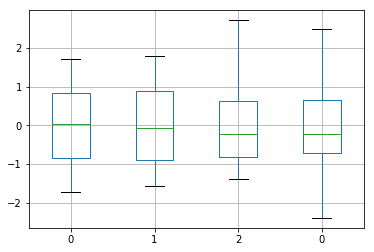

In [330]:
X_.boxplot()


In [331]:
Xgdeda = X_.iloc[:,:-1]

In [332]:
Xgdeda.shape

(198, 3)

In [333]:
ygdeda = X_.iloc[:,-1].values.reshape(-1,1)
ygdeda.shape

(198, 1)

In [334]:
LR3 = LinearRegression()
LR3.fit(Xgdeda,ygdeda)
LR3.intercept_, LR.coef_

Y_hat3 = LR3.predict(Xgdeda)
J_hat3 = mse(Y_hat3, ygdeda)
print(J_hat3)
R_Square3 = mc.r2_score(ygdeda, Y_hat3)
print(R_Square3)

0.10374827447067661
0.8953917183024752


## with Normalization 

In [335]:
X4 = dataset[['TV', 'Radio', 'Newspaper']]
Y4 = dataset['Sales'].values.reshape(-1,1)
X4 = minmax_scale(X4)
Y4 = minmax_scale(Y4)

In [336]:
LR4 = LinearRegression()
LR4.fit(X4,Y4)
LR4.intercept_, LR.coef_


(array([0.05396116]), array([ 0.04576465,  0.18853002, -0.00103749]))

In [337]:
Y_hat4 = LR4.predict(X4)
J_hat4 = mse(Y_hat, Y4)
print(J_hat)
R_Square4 = mc.r2_score(Y4, Y_hat4)
print(R_Square4)

2.784126314510936
0.8972106381789521


# DAta Evaluation

In [338]:
data_eval = pd.DataFrame([['Model1', J_hat1, sqrt(J_hat1), R_Square1]
                          , ['Standardiezd', J_hat2,sqrt(J_hat2), R_Square2]
                          , ['Standardiezd withou outliers', J_hat3,sqrt(J_hat3), R_Square3]
                          ,['Normalizing', J_hat4,sqrt(J_hat4), R_Square4]]
                        ,columns=['Model', 'MSE','RMSE', 'R Squared'])

In [339]:
data_eval

,Model,MSE,RMSE,R Squared
0,Model1,2.784126,1.668570,0.897211
1,Standardiezd,0.102789,0.320608,0.897211
2,Standardiezd withou outliers,0.103748,0.322100,0.895392
3,Normalizing,0.810715,0.900397,0.897211
